In [1]:
import torch
import nntools as nt
from models import generator,discriminator
import matplotlib.pyplot as plt
import torchvision
import imageio
import numpy as np
from models.feature_axis import *

In [2]:
coeff = np.load('./data/coefficients_tanh_jules.npy')

In [3]:
feature_direction = normalize_feature_axis(coeff)

In [4]:
len_z, len_y = feature_direction.shape

In [5]:
feature_name = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

In [6]:
feature_direction_disentangled = disentangle_feature_axis_by_idx(feature_direction, idx_base=range(len_y), idx_target=None)

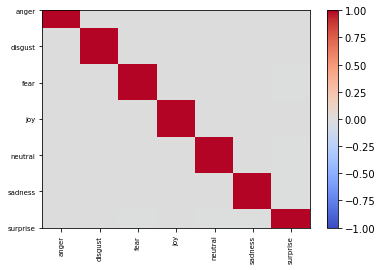

array([[ 9.9999994e-01, -2.6640423e-09,  2.1531207e-08,  2.0775417e-08,
         1.6814381e-08,  4.9031467e-08,  2.1440407e-07],
       [-2.6640423e-09,  1.0000000e+00,  7.1810035e-08,  5.3837919e-08,
         7.5157608e-08,  1.1076327e-07,  3.7330670e-07],
       [ 2.1531207e-08,  7.1810035e-08,  1.0000001e+00, -3.3898914e-08,
        -1.2518228e-08, -2.9451712e-08, -9.0858805e-08],
       [ 2.0775417e-08,  5.3837919e-08, -3.3898914e-08,  1.0000001e+00,
        -2.3042425e-08, -2.4194213e-08, -4.3308921e-09],
       [ 1.6814381e-08,  7.5157608e-08, -1.2518228e-08, -2.3042425e-08,
         9.9999994e-01, -2.5309900e-08, -2.8931592e-07],
       [ 4.9031467e-08,  1.1076327e-07, -2.9451712e-08, -2.4194213e-08,
        -2.5309900e-08,  1.0000001e+00, -8.0351789e-08],
       [ 2.1440407e-07,  3.7330670e-07, -9.0858805e-08, -4.3308921e-09,
        -2.8931592e-07, -8.0351789e-08,  9.9999988e-01]], dtype=float32)

In [7]:
plot_feature_cos_sim(feature_direction_disentangled[:,:7], feature_name=feature_name)

In [8]:
from train import *

In [9]:
exp1.load()

In [10]:
noise1 = torch.randn(8, args["nz"], 1, 1, device=device)
noise2 = torch.ones(8, args["nz"], 1, 1, device=device)
# delta = (noise2-noise1)/10

In [11]:
feature_direction = feature_direction_disentangled
delta = torch.Tensor(feature_direction[:,0]).to(device)
delta = delta.unsqueeze(1).unsqueeze(1).unsqueeze(0).expand(8,100,1,1)

filenames = []
for i in range(20):
    img_gen = generator_(noise1 + i*0.5*delta)
    torchvision.utils.save_image(img_gen.detach(),f'./test{i}_del.png',normalize=True)
    filenames.append(f'./test{i}_del.png')

images = []
kargs = { 'duration': 1 }
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('test.gif', images, 'GIF', **kargs)